<a href="https://www.kaggle.com/code/avalok/house-prediction-linear-regression?scriptVersionId=217296918" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Now Load the dataset of fetch_california_housing.
data = fetch_california_housing()
housing = pd.DataFrame(data.data, columns=data.feature_names)
housing['Price'] = data.target

housing.info()
housing.describe()
housing.head()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

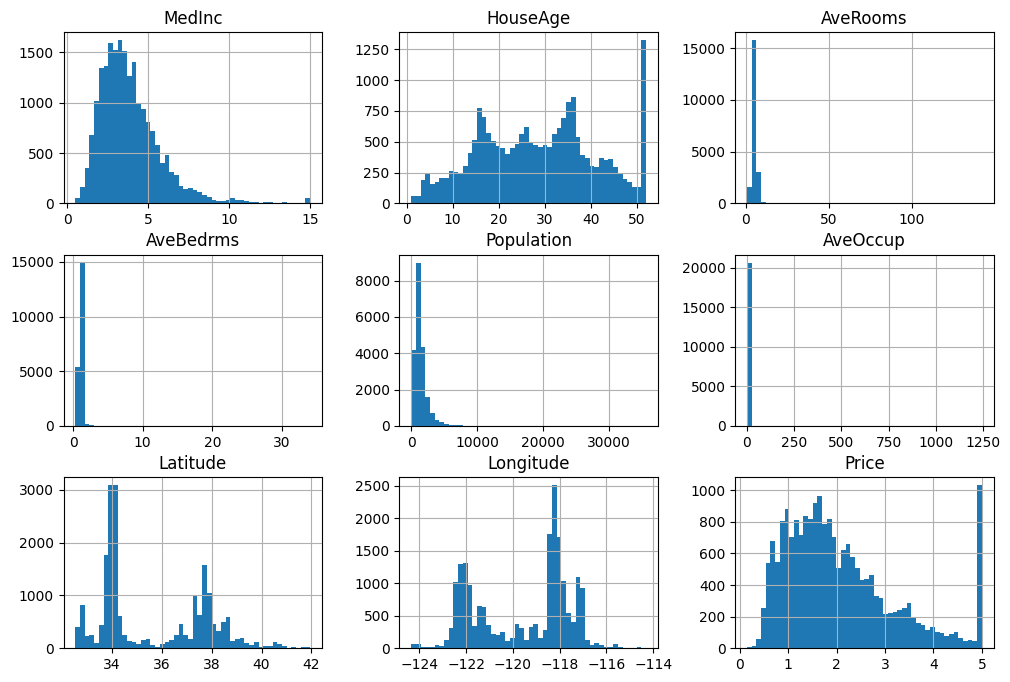

In [2]:
housing.hist(bins=50, figsize=(12,8))

In [3]:
corr_matrix = housing.corr()
corr_matrix['Price'].sort_values(ascending=False)

Price         1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: Price, dtype: float64

In [4]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
len(train_set), len(test_set)

(16512, 4128)

In [5]:
X_train = train_set.drop('Price', axis=1)
y_train = train_set['Price']

X_test = test_set.drop('Price', axis=1)
y_test = test_set['Price']

In [6]:
# Feature Scaleing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled = scaler.transform(X_train)

In [7]:
# Train a basic model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_train_pred = lin_reg.predict(X_train_scaled)

In [8]:
# Evaluate the model
from sklearn.metrics import mean_squared_error
import numpy as np

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_rmse 

0.7196757085831575

In [9]:
# Evaluate the test data
y_test_pred = lin_reg.predict(X_test_scaled)

train_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
train_rmse * 100 

74.55813830127762